In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "3"

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torchaudio

import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display

from omegaconf import OmegaConf

from inference_utils import Inference

import glob
import numpy as np

import matplotlib.pyplot as plt

def show_audio(audio_path):
    # pipe = AudioToMelPipe(random_split=False)
    # melspectrogram = pipe.load_audio(audio_path, target_frame_length=None)
    
    # display(librosa.display.specshow(melspectrogram[0].numpy(), sr=16000, hop_length=256, fmin=10., x_axis='time', y_axis='mel', cmap='magma'))

    y, sr = librosa.load(audio_path, sr=16000)
    S = librosa.feature.melspectrogram(y, sr=16000, n_fft=2048, hop_length=256)

    plt.figure(figsize=(12,4))
    plt.plot(np.arange(len(y)), y)
    plt.figure(figsize=(12,4))
    plt.imshow(np.log10(S+10e-3), interpolation='nearest',  origin='lower')

    display(ipd.Audio(audio_path))

# Initialize Module

In [2]:
# checkpoint = "/lightning_logs/default/version_0/checkpoints/model-epoch=0072-val_f1=0.872.ckpt"
checkpoint = "/lightning_logs/threshold_100/mobilenetv2_h8_f6_log_mel128/checkpoints/model-epoch=0028-val_f1=0.645.ckpt"
config_path = os.path.join(
    os.path.dirname(os.path.dirname(checkpoint)), "config.yaml"
)
config = OmegaConf.load(config_path)
print(OmegaConf.to_yaml(config))

inference = Inference(checkpoint, config)

model: mobilenetv2
dataset:
  path: /data_segments/threshold_100/
  use_major_class: false
pipe:
  n_fft: 2048
  hop_length: 256
  sample_rate: 16000
  target_audio_sample_length: 16384
  n_mels: 128
  use_log: true
  min_audio_sample_length: 16384
training:
  batch_size: 128
  num_workers: 8
  max_epochs: 50
  log_every_n_steps: 5
  learning_rate: 0.001
  logdir: /lightning_logs/
  version: mobilenetv2_h8_f6_log_mel128



# Select Target Audio

In [3]:
test_audios = sorted(glob.glob("/data_segments/threshold_100/test/**/**.wav", recursive=True))
print(f'a total of {len(test_audios)} segments')
# print(np.array(test_audios)[10:20])

a total of 5986 segments


In [4]:
index_test = 333

audio_path = test_audios[index_test]
print(f'test audio: {test_audios[index_test]}')
# audio_path = "segment_samples/val/A_2_01/S-210810_A_201_D_0001_0.wav"

test audio: /data_segments/threshold_100/test/A_2_04/S-210821_A_204_D_026_0011_0.wav


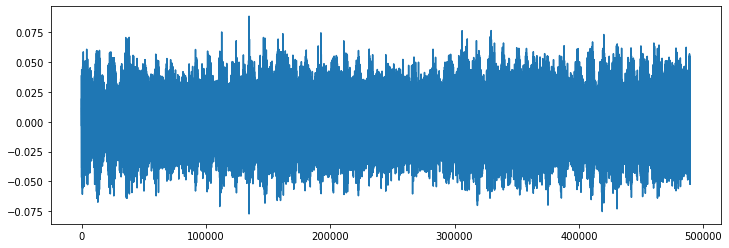

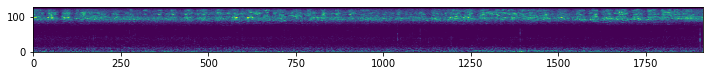

In [5]:
# audio_path="/workspace/nia/data_midterm/Label_0910_01/S-210908_W_102_D_021_0070.mp3"
show_audio(audio_path)

# Inference Result

In [6]:
inference.inference_audio(audio_path)

('H_2_03', 0.90040886)